In [240]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [241]:
path = r"C:\Users\joaof\OneDrive\Education\University\PhD_UVM\Courses\202526\Fall\CS5990A_NaturalLanguageProcessing\Project\nlp_project\DataPreprocessing\inputs\cleaned_courses (1).pkl"

In [242]:
df_orig = pd.read_pickle(path)

In [243]:
df = df_orig.copy()

In [244]:
df.head()

,ipeds_id,cat_type,start_yr,end_yr,page_num,col_num,type,annote_id,Department,Number,Title,Description,Prerequisites,Credits,Teacher,decade,quinquennium,DepartmentCleaned
0,190415,both,1998,1999,431,1,courses,701991,GOVT,605,Comparative Methods,This seminar provides a survey of different me...,,4,"{'Honorific': '', 'Name': 'J. Pontusson', 'Deg...",1990,1995,government
1,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,121,Remote Sensing: Digital Processing and Analysis,This course is not described in the text.,,3,{},2000,2005,soil and water conservation
2,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,128,Principles of Animal Behavior,This course is not described in the text.,,3,{},2000,2005,soil and water conservation
3,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,127,Avian Physiology,This course is not described in the text.,,3,{},2000,2005,soil and water conservation
4,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,126,Introduction to the Diseases of Wildlife,This course is not described in the text.,,3,{},2000,2005,soil and water conservation


# Data Description

In [245]:
# what corresponds to each row
print('each row corresponds to a course catalog')

each row corresponds to a course catalog


In [246]:
# nr universities
aux_ = df['ipeds_id'].value_counts()
print(f"The dataset has {aux_.shape[0]} universities\n")
aux_

The dataset has 25 universities



ipeds_id
204796    564270
110662    517202
166638    273896
110635    266041
199120    251647
126614    243195
233921    235155
231174    221784
163286    188704
134097    180020
232186    179092
190415    174716
200280    160695
129020    143781
187985    136193
156125    129699
211440    110808
243744    109711
102553     97765
100663     97436
142115     91219
199148     78292
147767     61204
100751     57178
228723     49233
Name: count, dtype: int64

In [ ]:
###in the DB there is already a id_catalog. for this NLP project purpose we created it here
df['id_catalog'] = df['ipeds_id'].astype(str) + '_' + df['cat_type'].astype(str)  + '_' + df['start_yr'].astype(str) + '_' + df['end_yr'].astype(str)

In [ ]:
# nr catalogs
aux_ = df['id_catalog'].value_counts()
print(f"The dataset has {aux_.shape[0]} catalogs\n")
aux_

The dataset has 1668 catalogs



id_catalog
110662_ug_2020_2021      14774
110662_ug_2019_2020      14764
204796_both_2015_2016    14699
204796_both_2014_2015    14504
110662_ug_2018_2019      14398
                         ...  
200280_both_1885_1886        1
200280_both_1900_1901        1
163286_both_1907_1908        1
200280_both_1887_1888        1
110635_misc_1964_1965        1
Name: count, Length: 1668, dtype: int64

In [ ]:
# nr courses
aux_ = df.shape[0]
print(f"The dataset has {aux_} catalogs\n")
aux_

The dataset has 4618936 catalogs



4618936

In [ ]:
# nr features that we have
aux_ = df_orig.columns
print(f"The dataset has {len(aux_)} features\n")
aux_

The dataset has 18 features



Index(['ipeds_id', 'cat_type', 'start_yr', 'end_yr', 'page_num', 'col_num',
       'type', 'annote_id', 'Department', 'Number', 'Title', 'Description',
       'Prerequisites', 'Credits', 'Teacher', 'decade', 'quinquennium',
       'DepartmentCleaned'],
      dtype='object')

In [ ]:
df.head()

,ipeds_id,cat_type,start_yr,end_yr,page_num,col_num,type,annote_id,Department,Number,Title,Description,Prerequisites,Credits,Teacher,decade,quinquennium,DepartmentCleaned
0,190415,both,1998,1999,431,1,courses,701991,GOVT,605,Comparative Methods,This seminar provides a survey of different me...,,4,"{'Honorific': '', 'Name': 'J. Pontusson', 'Deg...",1990,1995,government
1,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,121,Remote Sensing: Digital Processing and Analysis,This course is not described in the text.,,3,{},2000,2005,soil and water conservation
2,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,128,Principles of Animal Behavior,This course is not described in the text.,,3,{},2000,2005,soil and water conservation
3,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,127,Avian Physiology,This course is not described in the text.,,3,{},2000,2005,soil and water conservation
4,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,126,Introduction to the Diseases of Wildlife,This course is not described in the text.,,3,{},2000,2005,soil and water conservation


In [ ]:
# distribution of courses per year per university per cat_type
aux_ = df.groupby(['ipeds_id','cat_type','start_yr']).size()

In [ ]:
df['cat_type'].value_counts()

cat_type
both    2808939
ug      1229725
gr       563022
voc       15512
misc       1159
law         579
Name: count, dtype: int64

In [ ]:
# distribution of courses per year per university per cat_type


In [ ]:
min_start_yr = df['start_yr'].min()
max_start_yr = df['start_yr'].max()

In [ ]:
min_start_yr, max_start_yr

(np.int64(1883), np.int64(2023))

In [ ]:
min_val = aux_.min().min()
max_val = aux_.max().max()

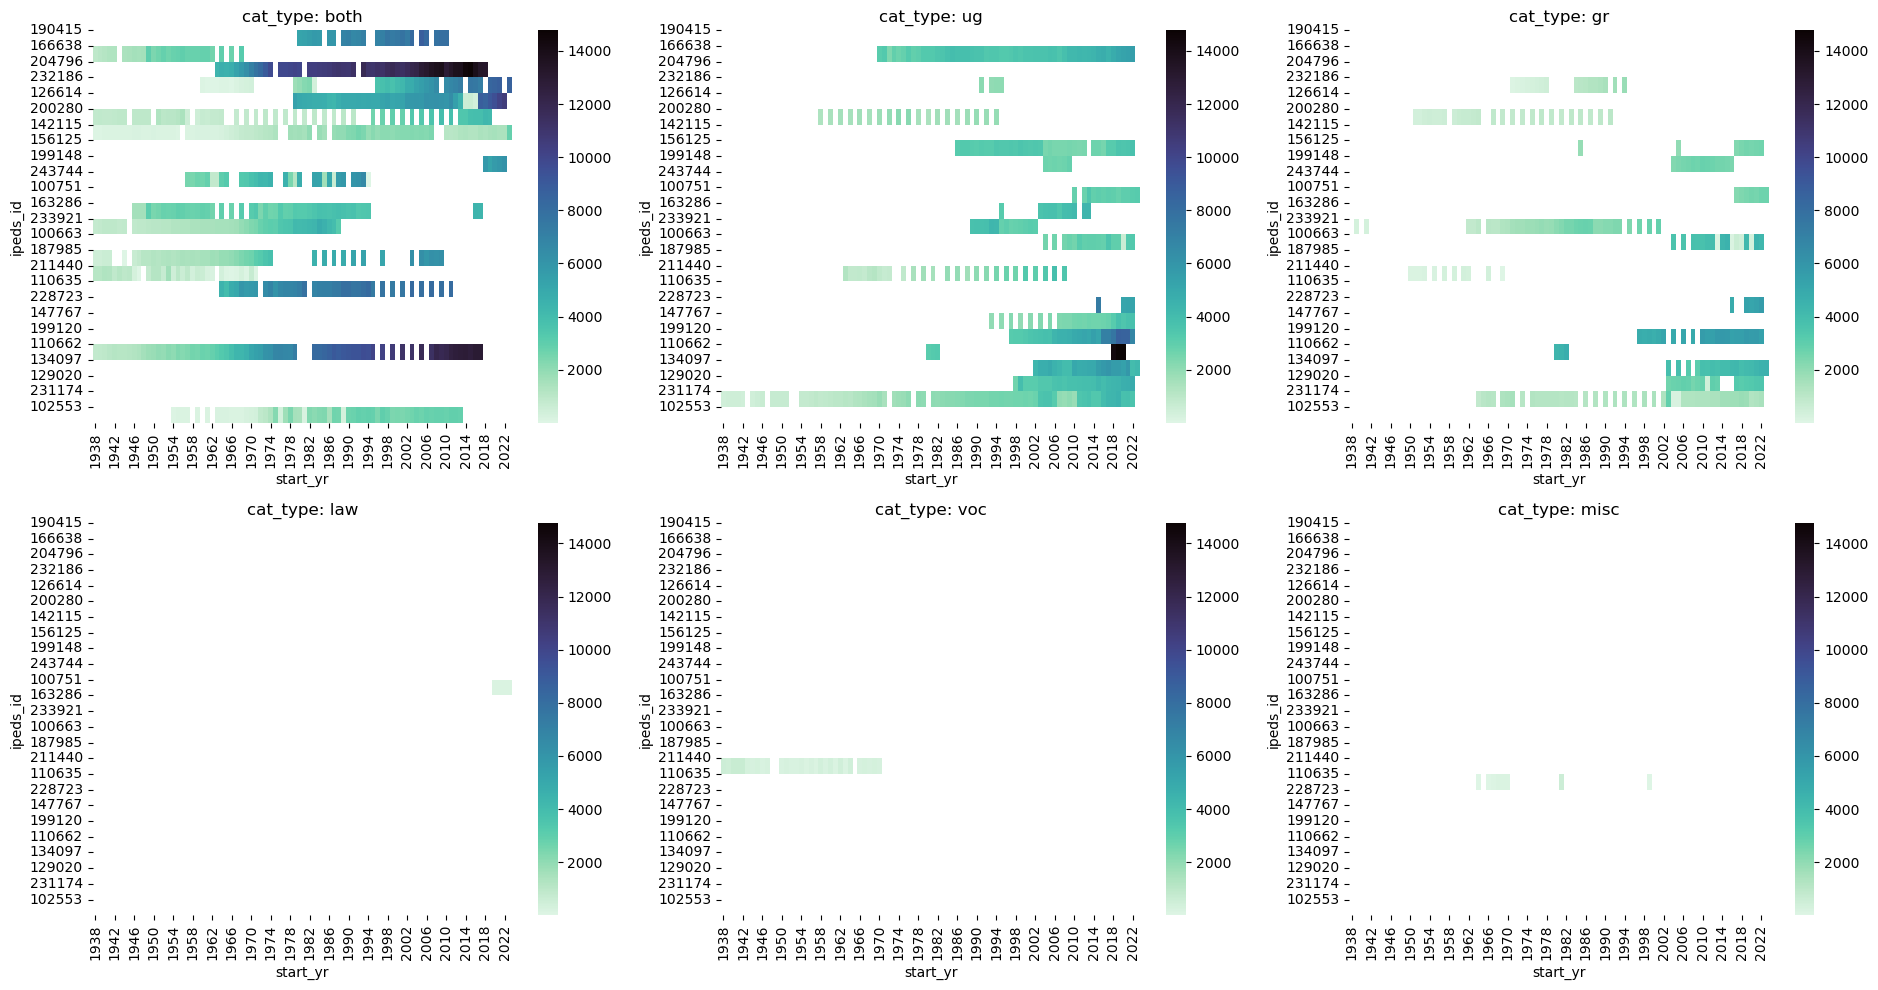

In [ ]:
fig,axes_orig = plt.subplots(figsize=(19,10),nrows=2, ncols = 3)
axes = axes_orig.flatten()

full_index = df['ipeds_id'].unique()

##data to identify the number of courses per unique catalog
aux_ = df.groupby(['ipeds_id','cat_type','start_yr']).size()

for idx,cat_type in enumerate(df['cat_type'].unique()):
    data_ =  aux_.unstack().xs(cat_type, level='cat_type')

    

    sns.heatmap(                
            # in AI_orig I tried to group words based on historical evolution of utilization. I tried to plot in same order to find visual clusters/patterns 
            data_.reindex(columns=range(1938, 2024), fill_value=np.nan).reindex(index = full_index, fill_value=np.nan),
            cmap=sns.color_palette("mako_r", as_cmap=True),
            vmax=max_val,
            vmin=min_val,
            ax = axes[idx]
            )
    axes[idx].set_title(f'cat_type: {cat_type}')
    axes[idx].set_yticks(range(len(full_index)))
    axes[idx].set_yticklabels(full_index)

plt.tight_layout()

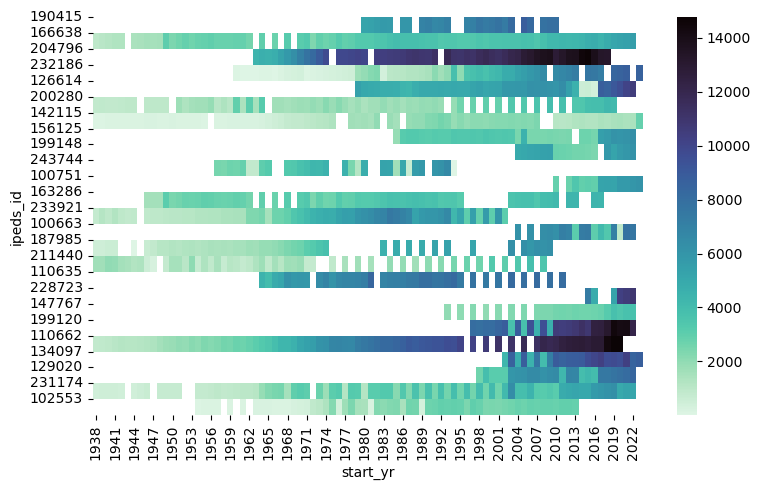

In [ ]:
# distribution of courses per year per university NOT per cat_type

fig,axes_orig = plt.subplots(figsize=(8,5),nrows=1, ncols = 1)
axes = axes_orig

full_index = df['ipeds_id'].unique()

##data to identify the number of courses per unique catalog
data_ = df.groupby(['ipeds_id','start_yr']).size()

sns.heatmap(                
        # in AI_orig I tried to group words based on historical evolution of utilization. I tried to plot in same order to find visual clusters/patterns 
        data_.unstack().reindex(columns=range(1938, 2024), fill_value=np.nan).reindex(index = full_index, fill_value=np.nan),
        cmap=sns.color_palette("mako_r", as_cmap=True),
        vmax=max_val,
        vmin=min_val,
        ax = axes
        )
axes.set_yticks(range(len(full_index)))
axes.set_yticklabels(full_index)

plt.tight_layout()

In [ ]:
max_start_yr-65

np.int64(1958)

In [239]:
df['id_catalog'].value_counts()

KeyError: 'id_catalog'

[Text(0, 0, '0%'),
 Text(0, 10, '10%'),
 Text(0, 20, '20%'),
 Text(0, 30, '30%'),
 Text(0, 40, '40%'),
 Text(0, 50, '50%'),
 Text(0, 60, '60%'),
 Text(0, 70, '70%'),
 Text(0, 80, '80%'),
 Text(0, 90, '90%'),
 Text(0, 100, '100%')]

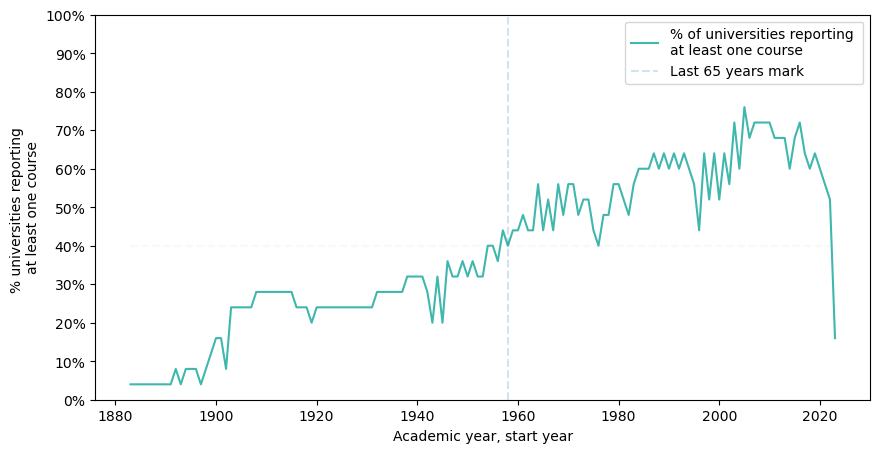

In [238]:
fig,axes_orig = plt.subplots(figsize=(8,5),nrows=1, ncols = 1)
axes = axes_orig

(df.groupby('start_yr')['ipeds_id'].nunique()/df['ipeds_id'].nunique()*100).plot(color=sns.color_palette("mako_r")[1],
                                                                             figsize = (10,5),
                                                                             ax = axes,
                                                                             label='% of universities reporting \nat least one course')
axes.set_xlabel("Academic year, start year")
axes.set_ylabel("% universities reporting \nat least one course")
axes.set_ylim(0,1)
axes.vlines(1958, ymin=0, ymax=100, linestyles='--' ,alpha=0.2, label='Last 65 years mark')
axes.legend()
axes.hlines(40,xmax=max_start_yr, xmin=min_start_yr, linestyles='--', alpha=0.05, colors='grey')
#axes.set_frame_on(False)
axes.set_yticks(range(0,110,10))
axes.set_yticklabels([f'{i}%' for i in range(0,110,10)])

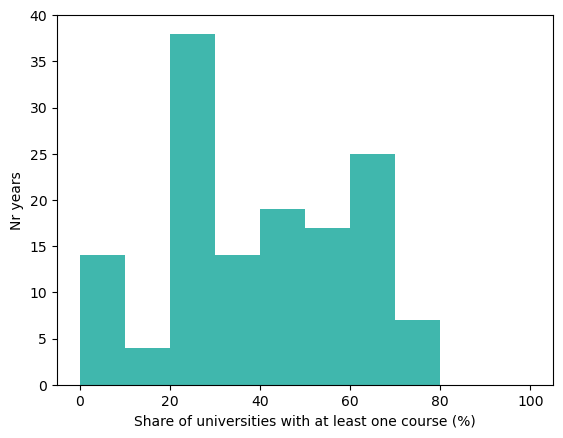

In [ ]:
(data_.unstack().notna().sum(axis=0)
 .div(data_.unstack().shape[0])
 .mul(100)
 .hist(grid=False, color=sns.color_palette("mako_r")[1], bins=range(0,110,10)))
plt.xlabel("Share of universities with at least one course (%)")
plt.ylabel("Nr years")
plt.ylim(0,40)
#plt.title("Years Counts by Share of Universities Offering \n at Least One Course")
plt.show()

In [191]:
max_start_yr-65, max_start_yr

(np.int64(1958), np.int64(2023))

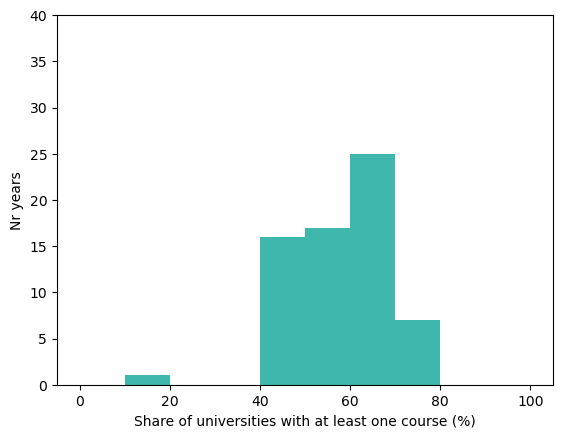

In [193]:

data_last_65y=data_.unstack().loc[:,range(max_start_yr-65, max_start_yr+1)]

(data_last_65y.notna().sum(axis=0)
 .div(data_last_65y.shape[0])
 .mul(100)
 .hist(grid=False, color=sns.color_palette("mako_r")[1], bins=range(0,110,10)))
plt.xlabel("Share of universities with at least one course (%)")
plt.ylabel("Nr years")
plt.ylim(0,40)
#plt.title("Years Counts by Share of Universities Offering \n at Least One Course (Last 65 years of data)")
plt.show()

# Data limitations


In [104]:
#identify difference between years
aux_ = (df['end_yr'] - df['start_yr'])
print(aux_.value_counts())

print('\nit seems that the OCR failed in identifying some years of catalogs\n')

print(df[aux_<0].head().iloc[:,:5])

print(f"\n this seems to occur in {df[aux_<0].loc[:,['ipeds_id','cat_type','start_yr','end_yr']].drop_duplicates().shape[0]} catalog")

 1     4260199
 2      345257
-98      10621
 0        2859
Name: count, dtype: int64

it seems that the OCR failed in identifying some years of catalogs

        ipeds_id cat_type  start_yr  end_yr  page_num
2312181   110662     both      1999    1901       344
2312183   110662     both      1999    1901       344
2312184   110662     both      1999    1901       344
2312185   110662     both      1999    1901       344
2312186   110662     both      1999    1901       344

 this seems to occur in 1 catalog


In [ ]:
#Identify if there was an error in collecting course descriptions/identifying courses
aux_ = df['Description'].value_counts(dropna=False)
aux_.head(50)/df.shape[0], (aux_.head(50)/df.shape[0]).sum() 

(Description
                                                                                                                                                                                                                                                                             0.136036
                                                                                                                                                                                                                                                                             0.001079
 See Schedule of Courses for specific titles.                                                                                                                                                                                                                                0.000960
 nan                                                                                                                                                     

In [110]:
df.head()

,ipeds_id,cat_type,start_yr,end_yr,page_num,col_num,type,annote_id,Department,Number,Title,Description,Prerequisites,Credits,Teacher,decade,quinquennium,DepartmentCleaned
0,190415,both,1998,1999,431,1,courses,701991,GOVT,605,Comparative Methods,This seminar provides a survey of different me...,,4,"{'Honorific': '', 'Name': 'J. Pontusson', 'Deg...",1990,1995,government
1,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,121,Remote Sensing: Digital Processing and Analysis,This course is not described in the text.,,3,{},2000,2005,soil and water conservation
2,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,128,Principles of Animal Behavior,This course is not described in the text.,,3,{},2000,2005,soil and water conservation
3,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,127,Avian Physiology,This course is not described in the text.,,3,{},2000,2005,soil and water conservation
4,166638,ug,2009,2010,290,0,courses,378402,Soil and Water Conservation,126,Introduction to the Diseases of Wildlife,This course is not described in the text.,,3,{},2000,2005,soil and water conservation


In [111]:
#Identify if there was an error in collecting course descriptions/identifying courses
aux_ = df['Title'].value_counts(dropna=False)
aux_.head(50)/df.shape[0], (aux_.head(50)/df.shape[0]).sum() 

(Title
 Independent Study                            0.004039
 Special Topics                               0.003172
 Group Studies                                0.002104
 Seminar                                      0.001849
 Individual Studies                           0.001827
 Internship                                   0.001314
 Research                                     0.001177
 Directed Individual Study                    0.001119
 Thesis                                       0.001040
 SPECIAL STUDY                                0.000865
 Master's Thesis                              0.000782
 INDEPENDENT STUDY                            0.000745
 Undergraduate Research                       0.000740
 Advanced Special Topics                      0.000728
 Directed Studies                             0.000656
 SEMINAR                                      0.000574
 Experiential Learning                        0.000558
 Cooperative Education                        0.000542
 Di

In [ ]:
#Misspelling errors (TO IMPROVE: CHECK ZIP'S AND TBC LAW, TO POTENTIALL INFER MISSPELLING)

In [181]:
title_vocab = df['Title'].str.split().explode()

In [ ]:
df['annote_id'].value_counts()


annote_id
776596    81
722787    80
491767    79
729221    79
723475    78
          ..
686237     1
146755     1
147341     1
774083     1
489050     1
Name: count, Length: 426517, dtype: int64

<Axes: >

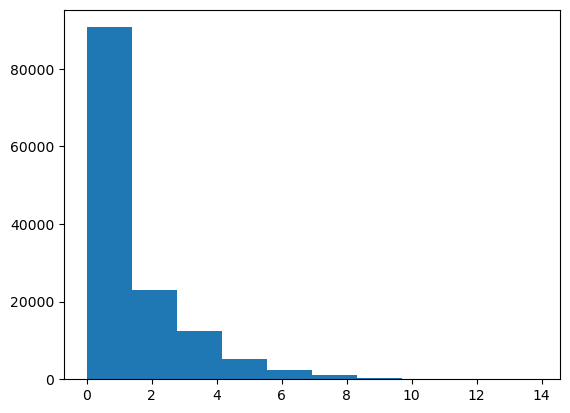

In [180]:
np.log(title_vocab.value_counts()).hist(grid=False)

In [184]:
for i in df['Description'].sample(10).tolist():
    print(i)
    print('----')


----
Introduction to best practices and principles related to the management of projects in educational organizations.
----
Specialized instruction using variable formats in relevant criminal justice subjects.
----
An integrated approach to the sustainable maintenance of constructed landscapes - residential, commercial, and institutional, combining research based knowledge with field experience in maintenance practices.
----
Theories and methods of comparative and historical linguistics, emphasizing change in English, Indo-European, and Native American languages.
----
(4) Discussion, three hours.
----
This course deepens students' understanding of negotiation skills that can be used across a variety of settings. Students explore best practices in negotiation and learn to identify and apply optimal strategies. The dynamics of negotiating across diverse cultures and contexts are also examined.
----
Examination of importance of ethics in research.
----

----
Ecologic mechanisms that regu